In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
batting = pd.read_csv("batting_card.csv")
bowling = pd.read_csv("bowling_card.csv")
summary = pd.read_csv("summary.csv")
details = pd.read_csv("details.csv")

In [ ]:
# pd.set_option('display.max_colwidth',-1)

In [ ]:
batting.head()

#preprocessing of batting dataframe


In [13]:
batting.shape

(699, 24)

In [ ]:
batting = batting.drop('link',axis = 1)

In [79]:
batting.describe()

,season,match_id,innings_id,runs,ballsFaced,fours,sixes,runningOver,link
count,699.0,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,555.000000,0.0
mean,2022.0,1.298157e+06,1.497854,15.978541,13.648069,1.300429,0.473534,11.198378,NaN
std,0.0,1.341250e+01,0.500353,18.709462,12.716854,1.834448,0.978465,5.945497,NaN
min,2022.0,1.298135e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,NaN
25%,2022.0,1.298144e+06,1.000000,2.000000,4.000000,0.000000,0.000000,5.600000,NaN
50%,2022.0,1.298157e+06,1.000000,9.000000,10.000000,1.000000,0.000000,12.300000,NaN
75%,2022.0,1.298169e+06,2.000000,22.500000,19.000000,2.000000,1.000000,16.350000,NaN
max,2022.0,1.298179e+06,2.000000,109.000000,64.000000,10.000000,8.000000,19.600000,NaN


In [175]:
batting.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2022,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,Australia,PAK,1,...,0,1,107.14,False,False,"{'wickets': 1, 'runs': 29}",4.2,b Curran,"bowled him, Rizwan's dragged on! Fullish, slanting into a wide-ish line, inviting the cover drive. Nips back in off the pitch, and Rizwan, going hard with a diagonal bat, can only get his inside edge to it",NaN
1,2022,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,Australia,PAK,1,...,2,0,114.28,True,False,"{'wickets': 3, 'runs': 84}",11.1,c &amp; b Rashid,"<B>caught and bowled!</B> That's the vital scalp, and Rashid has bagged it! it's another googly, another big wind-up from Babar, looking to take it on in the second half of the innings, but the ball gripped and turned back into his attempted cut/slash through the off-side, and looped back to the bowler off the splice! Huge turning point",NaN
2,2022,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,Australia,PAK,1,...,1,0,66.66,False,False,"{'wickets': 2, 'runs': 45}",7.1,c Stokes b Rashid,"and he strikes first ball! #MCGsobig strikes again. Tossed up fairly slow, and Haris steps out and tries to take on Stokes, who seems to be stationed a good few yards inside the rope at long-on. Can't really middle it, and Stokes moves in a little more to take a straightforward catch",NaN
3,2022,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,Australia,PAK,1,...,2,1,135.71,False,False,"{'wickets': 5, 'runs': 121}",16.3,c Livingstone b Curran,"<B>flicked in the air to Livingstone at midwicket!</B> Don't play roulette with Sam Curran! Masood shimmied to leg, tempting Curran to reconsider his options, he simply bowled his best ball, shaping away on a tight off-stump line, and the lofted cross-bat clip didn't have enough on it. A simple take in the deep, and Dr Death has done the trick once more...",NaN
4,2022,1298179,ENG v PAK,PAK,ENG,Melbourne Cricket Ground,Melbourne,Australia,PAK,1,...,0,0,0.00,False,False,"{'wickets': 4, 'runs': 85}",12.2,c &dagger;Buttler b Stokes,"<B>nibbles outside off, thin edge to Buttler!</B> Line and length from Stokes, extra lift off the seam, a thin but audible nick and that's a huge five minutes for the balance of play! More evidence, though, that this pitch is offering plenty to the seamers... and Pakistan have plenty of those!",NaN


In [12]:
batting.isnull().sum()

season               0
match_id             0
match_name           0
home_team            0
away_team            0
venue                0
city                 0
country              0
current_innings      0
innings_id           0
name                 0
fullName             0
runs                 0
ballsFaced           0
minutes              0
fours                0
sixes                0
strikeRate           0
captain              0
isNotOut             0
runningScore         0
runningOver        144
shortText            0
commentary         144
dtype: int64

In [14]:

batting.dtypes

season               int64
match_id             int64
match_name          object
home_team           object
away_team           object
venue               object
city                object
country             object
current_innings     object
innings_id           int64
name                object
fullName            object
runs                 int64
ballsFaced           int64
minutes             object
fours                int64
sixes                int64
strikeRate          object
captain               bool
isNotOut              bool
runningScore        object
runningOver        float64
shortText           object
commentary          object
dtype: object

In [78]:
#checking for the duplicate values
batting.duplicated().sum()

0

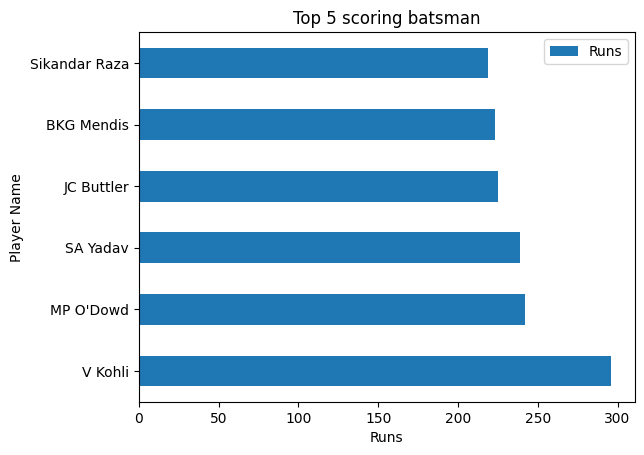

In [44]:
#top 5 scoring batsman in the series
runs = batting.groupby('name')['runs'].sum().reset_index(name='Runs')
runs= runs.sort_values(by='Runs',ascending=False).reset_index()
top_5_runs = runs.loc[0:5,['name','Runs']]
top_5_runs.plot.barh(x='name',y ='Runs')
plt.title("Top 5 scoring batsman")
plt.xlabel('Runs')
plt.ylabel('Player Name')
plt.show()

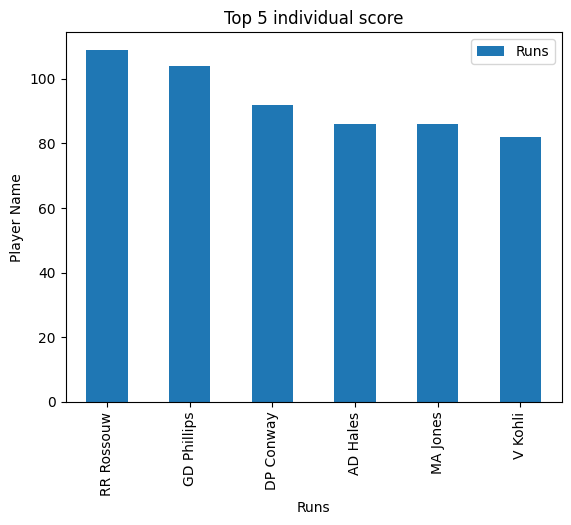

In [209]:
#maximum score by batsman in the series
runs = batting.groupby('name')['runs'].max().reset_index(name='Runs')
runs= runs.sort_values(by='Runs',ascending=False).reset_index()
individual_top_5_score = runs.loc[0:5,['name','Runs']]
individual_top_5_score.plot.bar(x='name',y ='Runs')
plt.title("Top 5 individual score")
plt.xlabel('Runs')
plt.ylabel('Player Name')
plt.show()

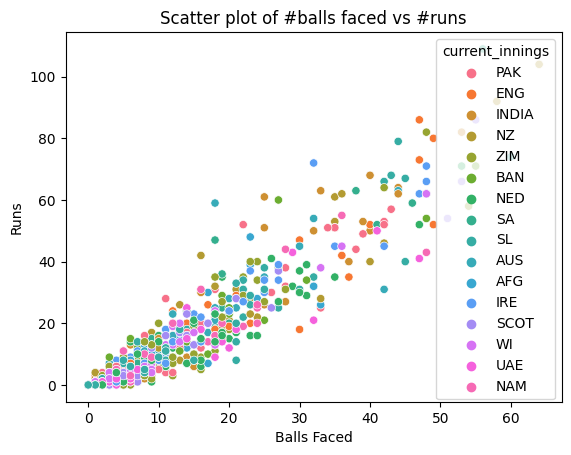

In [208]:
bat_bowl = batting[['current_innings','runs','ballsFaced']]
sns.scatterplot(x ="ballsFaced",y ="runs",data = bat_bowl,hue='current_innings')
plt.title("Scatter plot of #balls faced vs #runs")
plt.xlabel("Balls Faced")
plt.ylabel("Runs")
plt.show()

#Bowling Data Analysis

In [92]:
bowling.head()

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2022,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Australia,1,...,32,1,8.00,6,1,0,2,1,False,https://www.espncricinfo.com/ci/content/player/311158.html
1,2022,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Australia,1,...,26,0,8.66,7,2,1,2,0,False,https://www.espncricinfo.com/ci/content/player/247235.html
2,2022,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Australia,1,...,12,3,3.00,15,0,0,0,0,False,https://www.espncricinfo.com/ci/content/player/662973.html
3,2022,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Australia,1,...,22,2,5.50,10,1,0,1,0,False,https://www.espncricinfo.com/ci/content/player/244497.html
4,2022,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Australia,1,...,27,2,6.75,9,3,0,0,0,False,https://www.espncricinfo.com/ci/content/player/288992.html


In [93]:
bowling.describe()

,season,match_id,innings_id,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs
count,500.0,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2022.0,1.298157e+06,1.494000,3.154000,0.03400,23.170000,1.030000,7.593920,7.642000,1.818000,0.662000,0.618000,0.092000
std,0.0,1.351611e+01,0.500465,1.038615,0.19214,10.149637,1.023325,2.900713,4.216324,1.509116,0.872513,0.890878,0.340246
min,2022.0,1.298135e+06,1.000000,0.500000,0.00000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,1.298145e+06,1.000000,2.275000,0.00000,16.000000,0.000000,5.500000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,2022.0,1.298156e+06,1.000000,4.000000,0.00000,23.000000,1.000000,7.250000,8.000000,2.000000,0.000000,0.000000,0.000000
75%,2022.0,1.298169e+06,2.000000,4.000000,0.00000,30.000000,2.000000,9.000000,11.000000,3.000000,1.000000,1.000000,0.000000
max,2022.0,1.298179e+06,2.000000,4.000000,2.00000,59.000000,5.000000,23.000000,18.000000,8.000000,5.000000,6.000000,3.000000


In [94]:
bowling.dtypes

season           int64  
match_id         int64  
match_name       object 
home_team        object 
away_team        object 
bowling_team     object 
venue            object 
city             object 
country          object 
innings_id       int64  
name             object 
fullName         object 
overs            float64
maidens          int64  
conceded         int64  
wickets          int64  
economyRate      float64
dots             int64  
foursConceded    int64  
sixesConceded    int64  
wides            int64  
noballs          int64  
captain          bool   
href             object 
dtype: object

In [95]:
bowling.isnull().sum()

season           0
match_id         0
match_name       0
home_team        0
away_team        0
bowling_team     0
venue            0
city             0
country          0
innings_id       0
name             0
fullName         0
overs            0
maidens          0
conceded         0
wickets          0
economyRate      0
dots             0
foursConceded    0
sixesConceded    0
wides            0
noballs          0
captain          0
href             0
dtype: int64

In [252]:
bowler = bowling.groupby('name')['dots','wides','noballs','foursConceded','sixesConceded'].sum()
bowler.sort_

C:\Users\shiva\AppData\Local\Temp\ipykernel_71180\2947324029.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowling.groupby('name')['dots','wides','noballs','foursConceded','sixesConceded'].sum()


,dots,wides,noballs,foursConceded,sixesConceded
name,,,,,
A Nortje,58,0,1,3,5
A Zampa,24,1,0,4,2
AC Agar,8,1,0,1,0
AJ Hosein,25,1,1,5,4
AK Markram,4,1,0,0,1
...,...,...,...,...,...
W Madhevere,1,0,0,1,0
WD Parnell,48,2,0,6,5
WP Masakadza,5,1,0,1,0


In [97]:
bowling.duplicated().sum()

0

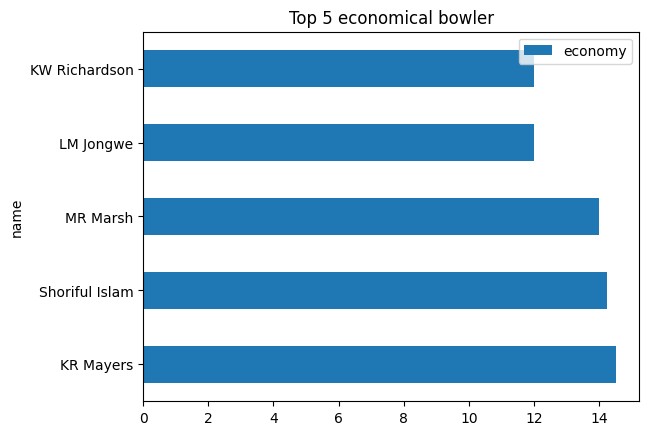

In [120]:
economical_bowler = bowling.groupby('name')['economyRate'].median().reset_index(name='economy')
top_5_economical_bowler = economical_bowler.sort_values(by='economy',ascending=False).reset_index()
top_5_economical_bowler.loc[0:4,['name','economy']].plot.barh(x = 'name',y='economy')
plt.title('Top 5 economical bowler')
plt.show()

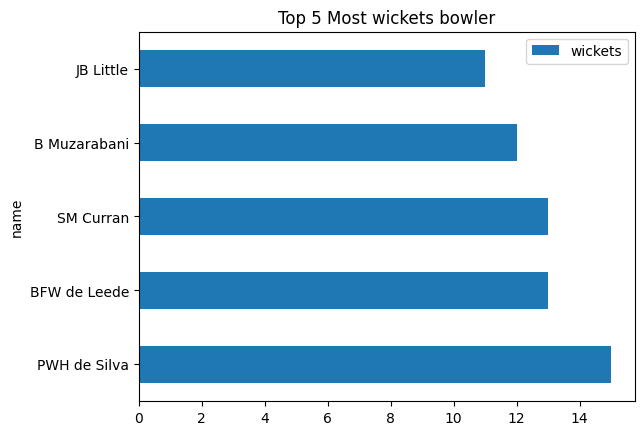

In [125]:
most_wicket = bowling.groupby('name')['wickets'].sum().reset_index(name='wickets')
top_5_most_wicket = most_wicket.sort_values(by='wickets',ascending=False).reset_index()
top_5_most_wicket.loc[0:4,['name','wickets']].plot.barh(x = 'name',y='wickets')
plt.title('Top 5 Most wickets bowler')
plt.show()

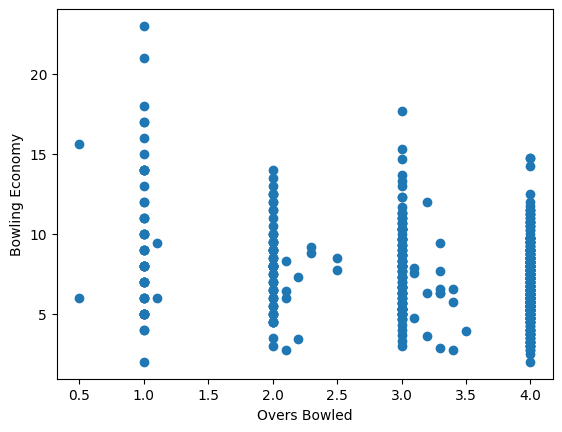

In [214]:
plt.scatter(x = bowling['overs'],y = bowling['economyRate'])
# plt.boxplot(x = bowling['overs'],y = bowling['economyRate'])
plt.ylabel('Bowling Economy')
plt.xlabel('Overs Bowled')
plt.show()

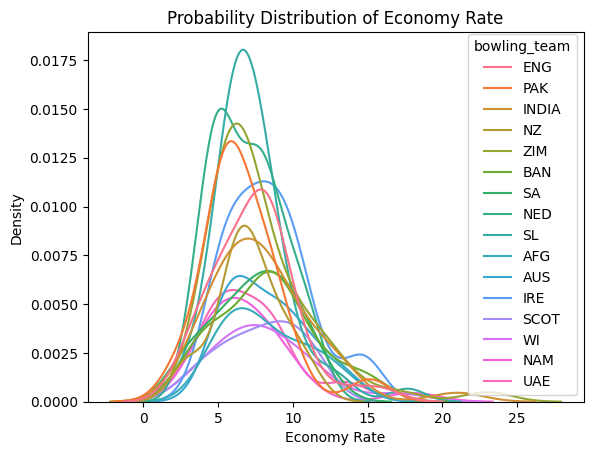

In [229]:
sns.kdeplot(x = 'economyRate',data = bowling,hue='bowling_team' )
plt.title("Probability Distribution of Economy Rate")
plt.xlabel("Economy Rate")
plt.show()

#Summary Data Analysis

In [7]:
summary.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022.0,1298179,England v Pakistan,ENG v PAK,"Final (N), ICC Men's T20 World Cup at Melbourn...",ENG,PAK,England,BOWL FIRST,137/8,...,"Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Shan Masood,Babar Azam","Haris Rauf,Shaheen Shah Afridi",13 November 2022 - night match (20-over match),Kumar Dharmasena,Marais Erasmus,Chris Gaffaney,Ranjan Madugalle,Paul Reiffel
1,2022.0,1298178,England v India,ENG v INDIA,"2nd Semi-Final (N), ICC Men's T20 World Cup at...",ENG,INDIA,England,BOWL FIRST,168/6,...,"Jos Buttler (WK),Alex Hales (UKN),Phil Salt (U...","KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Hardik Pandya,Virat Kohli","Hardik Pandya,Bhuvneshwar Kumar",10 November 2022 - night match (20-over match),Kumar Dharmasena,Paul Reiffel,Chris Gaffaney,David Boon,Rod Tucker
2,2022.0,1298177,New Zealand v Pakistan,NZ v PAK,"1st Semi-Final (N), ICC Men's T20 World Cup at...",NZ,PAK,New Zealand,BAT FIRST,152/4,...,"Finn Allen (UKN),Devon Conway (WK),Kane Willia...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Mohammad Rizwan,Babar Azam","Shaheen Shah Afridi,Mohammad Nawaz",9 November 2022 - night match (20-over match),Marais Erasmus,Richard Illingworth,Richard Kettleborough,Chris Broad,Michael Gough
3,2022.0,1298176,India v Zimbabwe,INDIA v ZIM,"42nd Match, Group 2 (N), ICC Men's T20 World C...",INDIA,ZIM,India,BAT FIRST,186/5,...,"KL Rahul (UKN),Rohit Sharma (UKN),Virat Kohli ...","Wessly Madhevere (AR),Craig Ervine (UKN),Regis...","Ryan Burl,Sikandar Raza","Sean Williams,Sikandar Raza",6 November 2022 - night match (20-over match),Richard Kettleborough,Rod Tucker,Aleem Dar,David Boon,Chris Brown
4,2022.0,1298175,Bangladesh v Pakistan,BAN v PAK,"41st Match, Group 2, ICC Men's T20 World Cup a...",BAN,PAK,Bangladesh,BAT FIRST,127/8,...,"Najmul Hossain Shanto (UKN),Litton Das (UKN),S...","Mohammad Rizwan (WK),Babar Azam (UKN),Mohammad...","Mohammad Rizwan,Mohammad Haris","Shaheen Shah Afridi,Shadab Khan",6 November 2022 (20-over match),Adrian Holdstock,Joel Wilson,Langton Rusere,Chris Broad,Michael Gough


In [147]:
summary.dtypes

season              float64
id                  int64  
name                object 
short_name          object 
description         object 
home_team           object 
away_team           object 
toss_won            object 
decision            object 
1st_inning_score    object 
2nd_inning_score    object 
home_score          object 
away_score          object 
winner              object 
result              object 
start_date          object 
end_date            object 
venue_id            int64  
venue_name          object 
home_captain        object 
away_captain        object 
pom                 object 
points              object 
super_over          object 
home_overs          float64
home_runs           float64
home_wickets        float64
home_boundaries     float64
away_overs          float64
away_runs           float64
away_wickets        float64
away_boundaries     float64
highlights          object 
home_key_batsman    object 
home_key_bowler     object 
home_playx1         

In [ ]:
summary[['']]

In [141]:
toss_summary = summary[['id','toss_won','winner']]
toss_summary[toss_summary['toss_won']=='England']
# toss_summary.groupby('toss_won')['winner']['toss_won'].count()

,id,toss_won,winner
0,1298179,England,ENG
1,1298178,England,ENG
12,1298167,England,ENG
25,1298154,England,IRE
31,1298148,England,ENG


#Analysis of Details dataframe


In [88]:
details.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,5.510000e+02,551.000000,551.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.216881e+05,2.172265,0.031654,14.684755,0.641042,5.691470e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.287888e+05,1.039511,0.182317,9.366489,0.833070,3.305531e+05,16.466801,11.707343
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,7.000000,0.000000,3.233890e+05,3.000000,5.000000
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.420230e+05,2.000000,0.000000,13.000000,0.000000,4.824780e+05,9.000000,10.000000
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.229430e+05,3.000000,0.000000,20.000000,1.000000,8.337770e+05,21.000000,19.000000
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


In [146]:
details[['runs','ball']]

,runs,ball
0,0,1
1,1,1
2,1,1
3,2,2
4,0,3
...,...,...
9809,1,2
9810,0,3
9811,0,4
9812,0,5


In [143]:
details.dtypes

comment_id           int64  
match_id             int64  
match_name           object 
home_team            object 
away_team            object 
current_innings      object 
innings_id           int64  
over                 int64  
ball                 int64  
runs                 int64  
shortText            object 
isBoundary           bool   
isWide               bool   
isNoball             bool   
batsman1_id          int64  
batsman1_name        object 
batsman1_runs        int64  
batsman1_balls       int64  
bowler1_id           int64  
bowler1_name         object 
bowler1_overs        float64
bowler1_maidens      int64  
bowler1_runs         int64  
bowler1_wkts         int64  
batsman2_id          int64  
batsman2_name        object 
batsman2_runs        int64  
batsman2_balls       int64  
bowler2_id           float64
bowler2_name         object 
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wicket_id     

<AxesSubplot:xlabel='runs', ylabel='Density'>

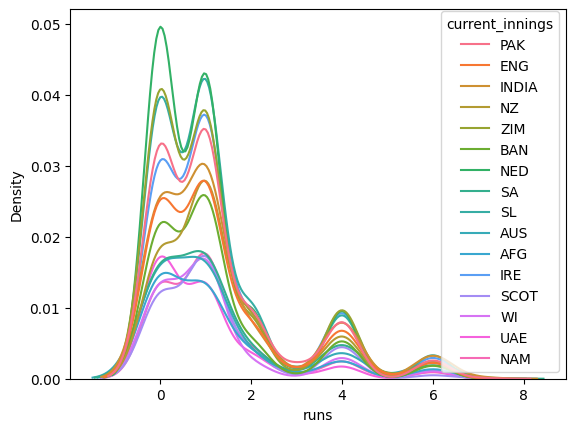

In [64]:
detail_dist = details[['runs','current_innings']]
sns.kdeplot(x='runs',hue='current_innings',data=detail_dist)
plt.show()

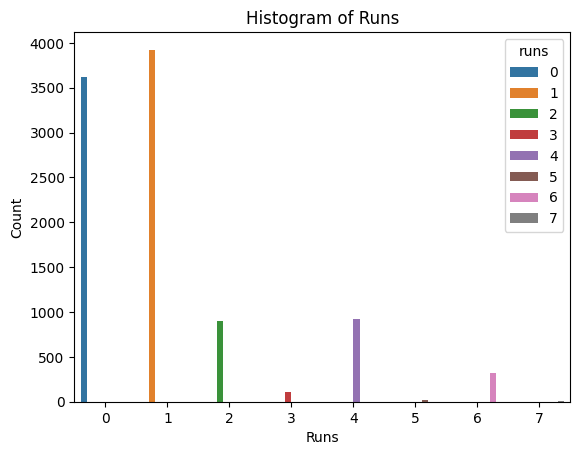

In [91]:
#Histogram of Runs
sns.countplot(x='runs',hue='runs',data=detail_dist)
plt.xlabel('Runs')
plt.ylabel('Count')
plt.title('Histogram of Runs')
plt.show()